In [38]:
import pandas as pd
import numpy as np

In [39]:
# Load the main files
books = pd.read_csv("books.csv")
ratings = pd.read_csv("ratings.csv")
book_tags = pd.read_csv("book_tags.csv")
tags = pd.read_csv("tags.csv")
to_read = pd.read_csv("to_read.csv")

In [40]:
# Check the first few rows and basic info
print("Books Data:")
print(books.info(),"\n")

print("Ratings Data:")
print(ratings.info(),"\n")

print("Book Tags Data:")
print(book_tags.info(), "\n")

print("Tags Data:")
print(tags.info(), "\n")

print("To Read Data:")
print(to_read.info(),"\n")


Books Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 no

In [41]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [42]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [43]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [44]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [45]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [46]:
print("Missing values:\n")
print("Books:\n", books.isnull().sum(), "\n")
print("Ratings:\n", ratings.isnull().sum(), "\n")
print("Book Tags:\n", book_tags.isnull().sum(), "\n")
print("Tags:\n", tags.isnull().sum(), "\n")
print("To Read:\n", to_read.isnull().sum(), "\n")

Missing values:

Books:
 id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64 

Ratings:
 book_id    0
user_id    0
rating     0
dtype: int64 

Book Tags:
 goodreads_book_id    0
tag_id               0
count                0
dtype: int64 

Tags:
 tag_id     

In [47]:
# Normalize ratings using Min-Max Scaling (0 to 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ratings['normalized_rating'] = scaler.fit_transform(ratings[['rating']])

# Optional: show a few samples
ratings[['user_id', 'book_id', 'rating', 'normalized_rating']].head()

,user_id,book_id,rating,normalized_rating
0,314,1,5,1.00
1,439,1,3,0.50
2,588,1,5,1.00
3,1169,1,4,0.75
4,1185,1,4,0.75


In [48]:
# Check missing values
print(books.isnull().sum())
print(ratings.isnull().sum())
print(book_tags.isnull().sum())
print(tags.isnull().sum())
print(to_read.isnull().sum())

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
book_id              0
user_id              0
rating               0
normalized_rating    0
dtype: int64
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
tag_id      0
tag_

In [49]:
books['isbn'] = books['isbn'].fillna('0000000000')
books['isbn13'] = books['isbn13'].fillna('0000000000000').astype(str)
books['original_title'] = books['original_title'].fillna(books['title'])
books['original_publication_year'] = books['original_publication_year'].fillna(books['original_publication_year'].median())
books['language_code'] = books['language_code'].fillna('unknown')

In [50]:
books.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
book_tags.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)
to_read.drop_duplicates(inplace=True)

In [51]:
ratings = ratings[ratings['book_id'].isin(books['book_id'])]
to_read = to_read[to_read['book_id'].isin(books['book_id'])]
book_tags = book_tags[book_tags['goodreads_book_id'].isin(books['book_id'])]

In [52]:
print(books.columns)


Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')


In [53]:
# Merge book_tags with tags
tagged_books = pd.merge(book_tags, tags, on="tag_id", how="left")

In [54]:
tagged_books

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult
...,...,...,...,...
999901,33288638,21303,7,neighbors
999902,33288638,17271,7,kindleunlimited
999903,33288638,1126,7,5-star-reads
999904,33288638,11478,7,fave-author


In [55]:
# Merge book_tags with tags
book_tags_merged = pd.merge(book_tags, tags, on='tag_id', how='left')

# Optional: Merge with books for enriched data
book_tags_full = pd.merge(book_tags_merged, books, left_on='goodreads_book_id', right_on='book_id', how='inner')

book_tags_full[['title', 'tag_name', 'count']].head()


,title,tag_name,count
0,Harry Potter and the Half-Blood Prince (Harry ...,to-read,167697
1,Harry Potter and the Half-Blood Prince (Harry ...,fantasy,37174
2,Harry Potter and the Half-Blood Prince (Harry ...,favorites,34173
3,Harry Potter and the Half-Blood Prince (Harry ...,currently-reading,12986
4,Harry Potter and the Half-Blood Prince (Harry ...,young-adult,12716


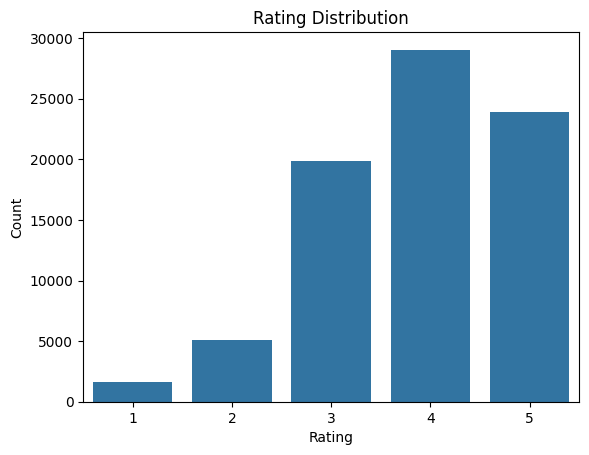

In [56]:
# Ratings distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\gowri\AppData\Local\Temp\ipykernel_21272\4234415688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='num_ratings', data=top_books_merged, palette='plasma')


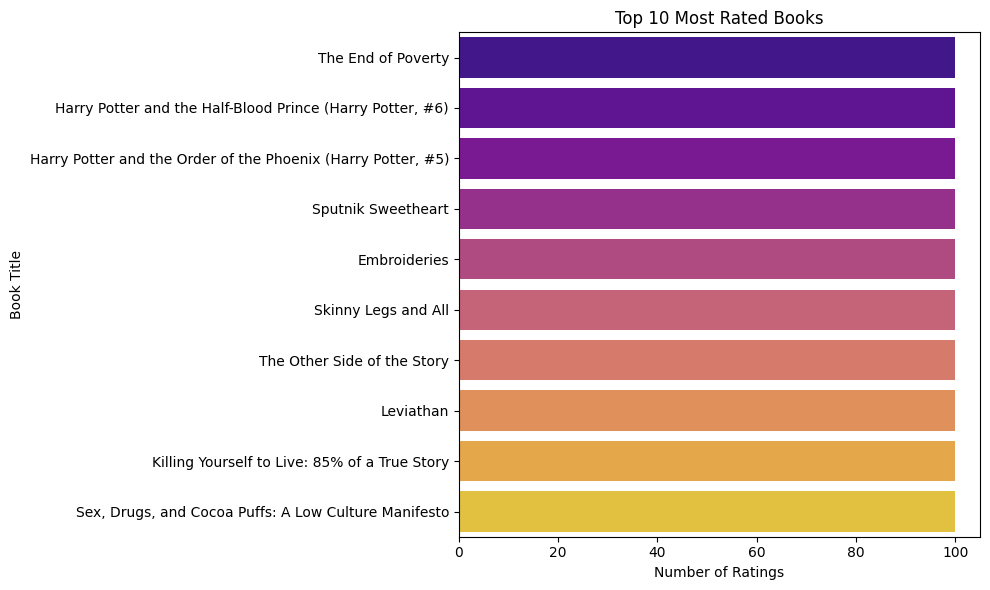

In [57]:
# Step 1: Get top 10 most rated book IDs from ratings
top_book_ids = ratings['book_id'].value_counts().head(10)
top_books_df = top_book_ids.reset_index()
top_books_df.columns = ['book_id', 'num_ratings']  # renamed to avoid column clash

# Step 2: Merge with books to get titles and authors
top_books_merged = top_books_df.merge(books, on='book_id')

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='num_ratings', data=top_books_merged, palette='plasma')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


C:\Users\gowri\AppData\Local\Temp\ipykernel_21272\1856008545.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='average_rating', data=top_rated, palette='viridis')


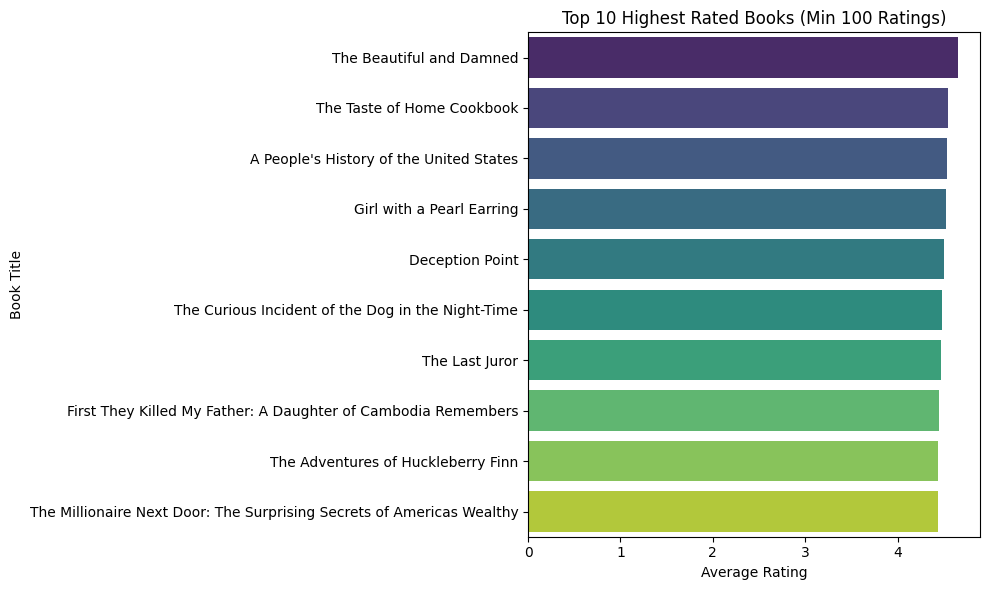

In [58]:
# Step 1: Calculate mean ratings and rating counts
mean_ratings = ratings.groupby('book_id')['rating'].mean()
ratings_count = ratings['book_id'].value_counts()

# Step 2: Filter only books with 100+ ratings
popular_books = mean_ratings[ratings_count >= 100].sort_values(ascending=False).head(10)

# Step 3: Get titles and authors (including book_id this time)
top_rated = books[books['book_id'].isin(popular_books.index)][['book_id', 'title', 'authors']]

# Step 4: Map the average ratings back
top_rated['average_rating'] = top_rated['book_id'].map(mean_ratings)

# Step 5: Sort and Plot
top_rated = top_rated.sort_values('average_rating', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='average_rating', data=top_rated, palette='viridis')

plt.title('Top 10 Highest Rated Books (Min 100 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

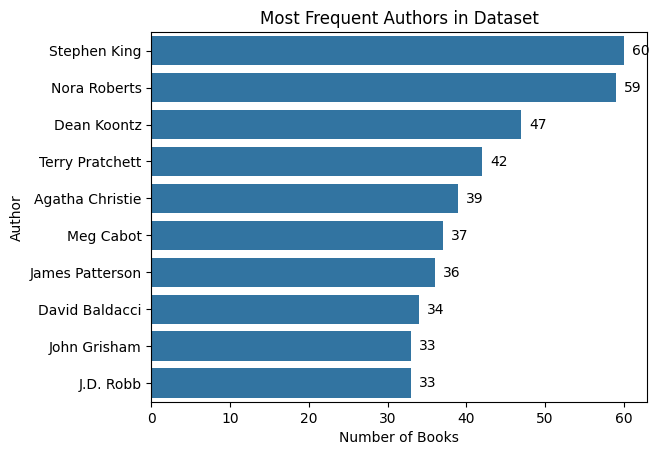

In [59]:
popular_authors = books['authors'].value_counts().head(10)
sns.barplot(y=popular_authors.index, x=popular_authors.values)
plt.title('Most Frequent Authors in Dataset')
plt.xlabel('Number of Books')
plt.ylabel('Author')
# Add value labels to bars
for i, value in enumerate(popular_authors.values):
    plt.text(value + 1, i, str(value), va='center')  # va = vertical alignment
plt.show()

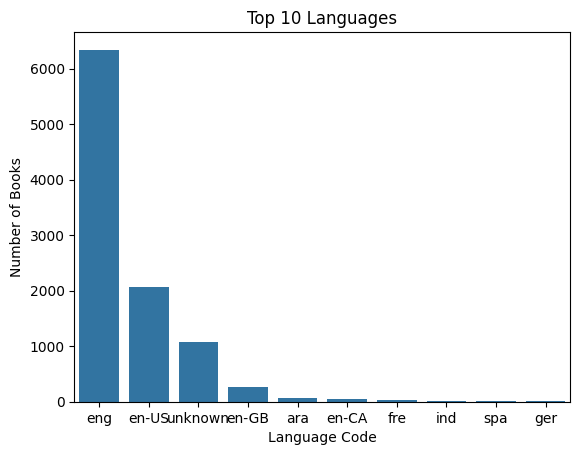

In [60]:
lang_counts = books['language_code'].value_counts().head(10)
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title('Top 10 Languages')
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.show()